In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy

In [2]:
data = pd.read_csv("./data/wikipedia.csv")
# clean out where text is NaN
data = data[data.text.notna()]

## anaylze data

In [6]:
data.head()

,text,label
0,"Brot (ahd. prôt, von urgerm. *brauda-) ist ein...",0
1,"Das feste, dunkle Äußere des Brotes heißt Krus...",0
2,"Das weiche, lockere Innere des Brotes ist die ...",0
3,Brotkrümel heißen auch Brosamen (aus dem Mitte...,0
4,"Der zu backende Teig besteht aus Mehl, Salz, W...",0


In [8]:
data.shape

(360, 2)

Text(0.5, 1.0, 'Class distribution')

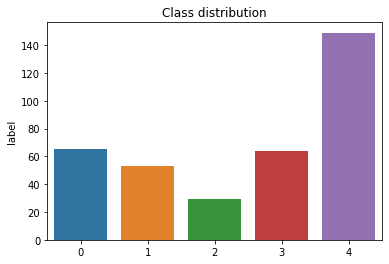

In [17]:
_x=data.label.value_counts()
sns.barplot(_x.index,_x).set_title("Class distribution")

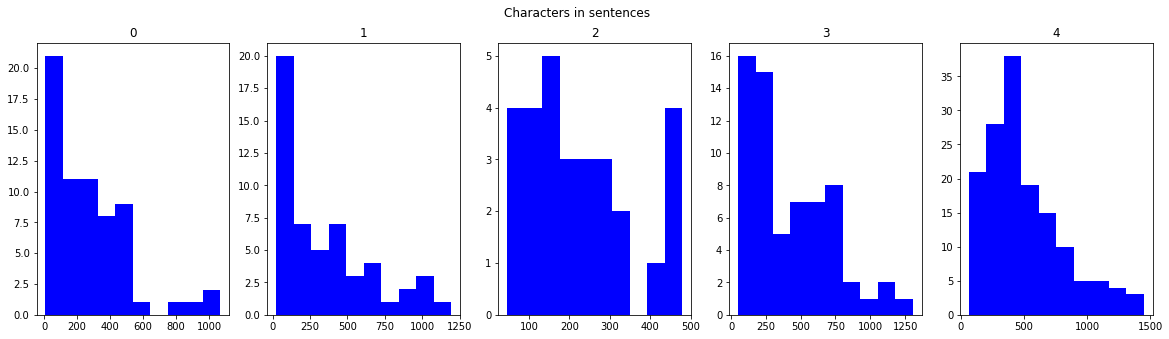

In [29]:
# num of characters per entry and category
axs = (ax1,ax2,ax3,ax4,ax5)
fig,axs=plt.subplots(1,5,figsize=(20,5))

for ax, label in zip(axs, data.label.unique()):
    sentence_length=data.text[data.label==label].str.len()
    ax.hist(sentence_length, color='blue')
    ax.set_title(label)
fig.suptitle('Characters in sentences')
plt.show()

In [40]:
from collections import  Counter

def create_corpus(target):
    corpus=[]
    
    for x in data[data['label']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<AxesSubplot:>

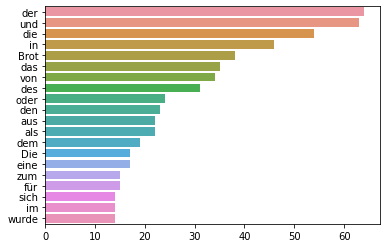

In [57]:
# find most common words
corpus=create_corpus(0)

counter = Counter(corpus)
most=counter.most_common()
x = [_m[1] for _m in most[:20]]
y = [_m[0] for _m in most[:20]]

sns.barplot(x=x, y=y)

## word vectorization

### GloVe (to-do)

In [ ]:
def create_corpus(data):
    corpus=[]
    for text in tqdm(data.text):
        words=[word.lower() for word in word_tokenize(tweet)]

### Spacy

In [3]:

# en_core_web_sm
# de_core_news_sm -> efficiency
    # can be sm, md, lg
# de_dep_news_trf -> accuracy
nlp = spacy.load('de_core_news_lg') # search for german

In [4]:
# example for word vector
text_txt = "Nee wat is dat ein schöner Tach"
with nlp.disable_pipes():
    vectors = np.array([token.vector for token in nlp(text_txt)])

In [6]:
# example for document vector
with nlp.disable_pipes():
    doc_vectors = np.array([nlp(text).vector for text in data.text])

In [5]:
doc_vectors.shape

(7, 300)

In [14]:
doc1=nlp('Äpfel sind gut')
doc2=nlp('Äpfel sind super')

print(doc1.similarity(doc2))

0.855937590364616


## preprocessing ideas

plan for now:
- make everything lower-case

following could be usefull
- remove puntuation
- transform every word to base form
- remove stopwords
- maybe remove links, tags, emojis etc (data cleaning)
- spelling correction